In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\gaura\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
Credit = pd.read_csv("creditcard.csv")

In [3]:
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
Credit.shape

(284807, 31)

In [4]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
Credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
print("Fraudulent Transactions - Transaction Amount")
print(Credit.Amount[Credit.Class == 1].describe())
print()

print("Normal Transactions - Transaction Amount")
print(Credit.Amount[Credit.Class == 0].describe())


Fraudulent Transactions - Transaction Amount
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transactions - Transaction Amount
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


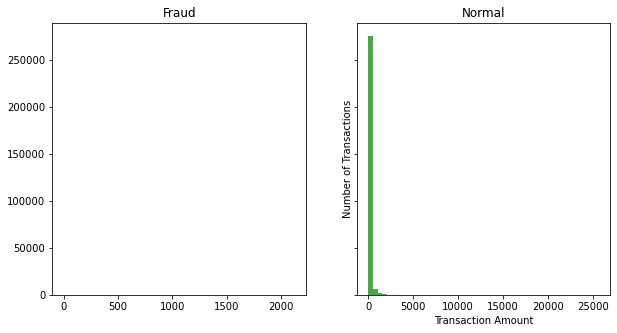

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,5))

bins = 50

ax1.hist(Credit.Amount[Credit.Class == 1], bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud')

ax2.hist(Credit.Amount[Credit.Class == 0], bins=bins, color='green', alpha=0.7)
ax2.set_title('Normal')

plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.show()

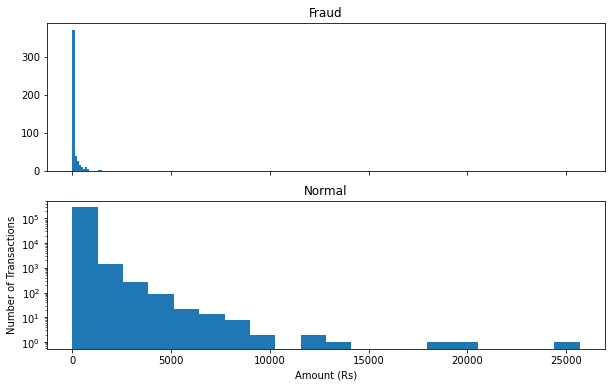

In [10]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,6))

bins = 20

ax1.hist(Credit.Amount[Credit.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(Credit.Amount[Credit.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount (Rs)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
columns_exclude = ["Class"]

X = Credit.loc[:, Credit.columns.difference(columns_exclude)]
Y = Credit["Class"]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =42 )

In [18]:
from sklearn.ensemble import IsolationForest

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [16]:
model = IsolationForest(
    n_estimators=150,  # Number of base estimators
    max_samples='auto',  # Number of samples to draw for each base estimator
    contamination='auto',  # Proportion of outliers in the dataset
    random_state=42,  # Random seed for reproducibility
    verbose=2  # Verbosity level (0: silent, 1: progress bar, 2: detailed)
)

# Training the model
model.fit(X_train)

NameError: name 'IsolationForest' is not defined

In [ ]:
# Anomaly scores prediction
anomaly_scores = model.score_samples(X_test)

# Predictions based on anomaly scores
threshold = -0.5  # Adjust the threshold as needed
y_pred = [1 if score < threshold else 0 for score in anomaly_scores]


In [ ]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
n_errors = (y_pred != Y_test).sum()

In [ ]:
# Calculate Isolation Forest and print number of errors
print(f"Isolation Forest {n_errors}")

# Calculate and print Accuracy Score
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Print Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))
